In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv('users.csv')

In [3]:
print(df.shape)


(5000, 6)


In [4]:
print(df.head(10))

  user_id  age    country subscription_type registration_date  \
0   U0001   21  Argentina             Basic        2022-10-02   
1   U0002   44     Mexico          Standard        2022-09-30   
2   U0003   20  Argentina          Standard        2023-01-24   
3   U0004   39       Peru          Standard        2022-12-15   
4   U0005   28   Colombia             Basic        2022-05-19   
5   U0006   39   Colombia          Standard        2023-12-20   
6   U0007   18   Colombia             Basic        2023-03-23   
7   U0008   56   Colombia          Standard        2023-01-22   
8   U0009   38     Mexico             Basic        2024-01-20   
9   U0010   20   Colombia          Standard        2022-04-05   

   total_watch_time_hours  
0                    58.0  
1                    75.3  
2                   360.0  
3                   513.0  
4                   192.8  
5                   156.2  
6                   428.0  
7                    47.8  
8                   229.7  
9   

In [5]:
#Unique values of the "subscription_type" column and their total count.
df["subscription_type"].value_counts()


subscription_type
Basic       2003
Standard    1783
Premium     1214
Name: count, dtype: int64

In [6]:
#Unique values of the "country" column and their total count.
df["country"].value_counts()


country
Mexico       1514
Colombia     1190
Argentina    1063
Chile         755
Peru          478
Name: count, dtype: int64

In [7]:
# Define the 10-year intervals
bins = range(0, df["age"].max() + 10, 10)

# Create the labels for the ranges
labels = [f"{i+1}-{i+10} years" for i in bins[:-1]]

# Group ages into intervals
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True, include_lowest=True)

# Count how many are in each group
age_distribution = df["age_group"].value_counts().sort_index()

print(age_distribution)

age_group
1-10 years        0
11-20 years     317
21-30 years    1035
31-40 years    1008
41-50 years    1062
51-60 years    1033
61-70 years     545
Name: count, dtype: int64


In [8]:
# Get information about df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 5000 non-null   object  
 1   age                     5000 non-null   int64   
 2   country                 5000 non-null   object  
 3   subscription_type       5000 non-null   object  
 4   registration_date       5000 non-null   object  
 5   total_watch_time_hours  5000 non-null   float64 
 6   age_group               5000 non-null   category
dtypes: category(1), float64(1), int64(1), object(4)
memory usage: 239.7+ KB
None


### 2\. Handling Missing Values

In [9]:
# Count the number of missing values per column
print(df.isnull().sum())

user_id                   0
age                       0
country                   0
subscription_type         0
registration_date         0
total_watch_time_hours    0
age_group                 0
dtype: int64


### 3\. Dropping duplicate rows

In [10]:
# Count the number of duplicate rows.
print(df.duplicated().sum())


0


### Central tendency

In [11]:
# Mean
df[["age", "total_watch_time_hours"]].mean()


age                        41.59100
total_watch_time_hours    335.04138
dtype: float64

In [12]:
# Median
df[["age", "total_watch_time_hours"]].median()


age                        42.00
total_watch_time_hours    312.35
dtype: float64

In [13]:
# Mode
df[["age", "total_watch_time_hours"]].mode()


,age,total_watch_time_hours
0,62,438.7


### Dispersion measures calculation

In [14]:
# Rango (max - min)
df[["age", "total_watch_time_hours"]].max() - df[["age", "total_watch_time_hours"]].min()


age                         47.0
total_watch_time_hours    1083.3
dtype: float64

In [15]:
# Varianza
df[["age", "total_watch_time_hours"]].var()


age                         193.982115
total_watch_time_hours    48410.478289
dtype: float64

In [16]:
# Desviación estándar
df[["age", "total_watch_time_hours"]].std()


age                        13.927746
total_watch_time_hours    220.023813
dtype: float64

In [17]:
# Coefficient of Variation 
df[["age", "total_watch_time_hours"]].std() / df[["age", "total_watch_time_hours"]].mean()


age                       0.334874
total_watch_time_hours    0.656706
dtype: float64

In [18]:
# Percentiles
df[["age", "total_watch_time_hours"]].quantile([0.25, 0.5, 0.75])


,age,total_watch_time_hours
0.25,30.0,163.90
0.50,42.0,312.35
0.75,54.0,455.40


In [19]:
# IQR (Q3 - Q1)
Q1 = df[["age", "total_watch_time_hours"]].quantile(0.25)
Q3 = df[["age", "total_watch_time_hours"]].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


age                        24.0
total_watch_time_hours    291.5
dtype: float64


### Distribution analysis of key variables

### age column

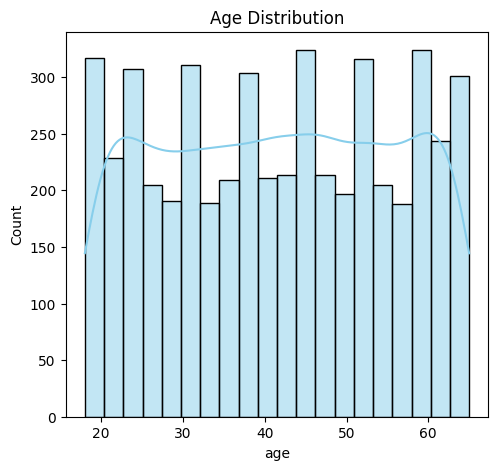

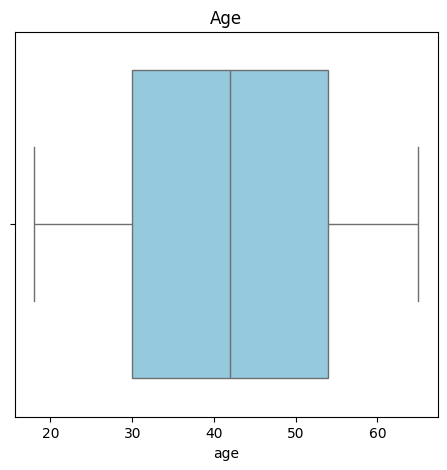

In [20]:
# Histograms to view distribution
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['age'], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution")

plt.show()

# Box plots to detect outliers
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['age'], color="skyblue")
plt.title("Age")

plt.show()

As you can see in the boxplot, It hasn´t outliers 

### total_watch_time_hours column

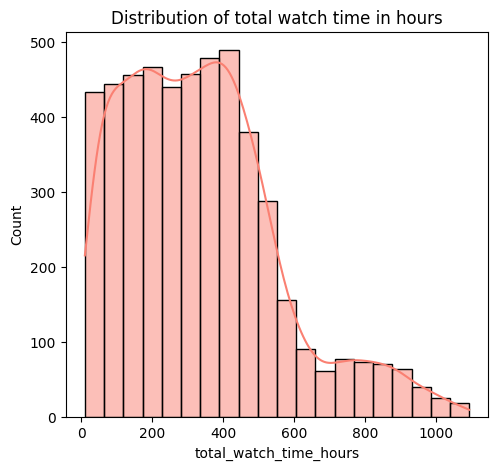

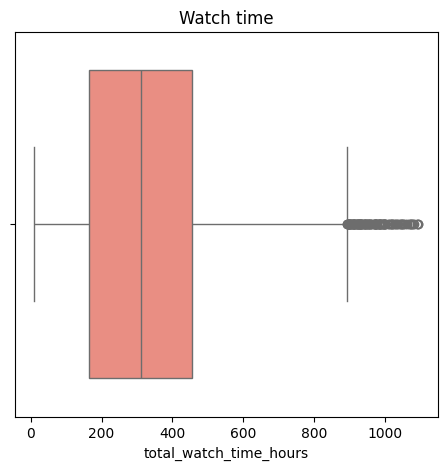

In [21]:
# Histograms to view distribution
plt.figure(figsize=(12,5))

plt.subplot(1,2,2)
sns.histplot(df['total_watch_time_hours'], bins=20, kde=True, color="salmon")
plt.title("Distribution of total watch time in hours")

plt.show()

# Box plots to detect outliers
plt.figure(figsize=(12,5))

plt.subplot(1,2,2)
sns.boxplot(x=df['total_watch_time_hours'], color="salmon")
plt.title("Watch time")

plt.show()

As you can see, the boxplot show outliers after the limit of 900 hours. That's why is necessary separate them from this dataset

### Outliers

For this dataframe, we decided to separate the outliers from the **"users.csv"** file and create a new one with all the outliers and another without them. This was done to avoid deleting the outliers, as they could provide a good insight into the behavior of that part of the sample.

### Calculate Outliers using the "total_watch_time_hours" column

In [22]:
# Calculate Q1 (25%) and Q3 (75%)
Q1 = df["total_watch_time_hours"].quantile(0.25)
Q3 = df["total_watch_time_hours"].quantile(0.75)
IQR = Q3 - Q1

# Define the limits to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Filter the outliers
outliers = df[(df["total_watch_time_hours"] < lower_bound) |
              (df["total_watch_time_hours"] > upper_bound)]

print("Number of outliers:", outliers.shape[0])
print(outliers[["user_id", "age", "total_watch_time_hours"]].head(12))

Lower bound: -273.35
Upper bound: 892.65
Number of outliers: 120
    user_id  age  total_watch_time_hours
116   U0117   22                  1034.7
157   U0158   22                  1018.9
272   U0273   18                  1041.9
286   U0287   22                   903.9
306   U0307   47                   908.3
318   U0319   26                  1061.9
349   U0350   45                   995.2
363   U0364   25                  1072.5
381   U0382   39                   982.8
393   U0394   44                   941.9
458   U0459   28                  1050.0
523   U0524   33                   952.0


### Separating the dataframe into a set without outliers and a set with only outliers

In [23]:
# DataFrame with outliers
df_outliers_users = df[(df["total_watch_time_hours"] < lower_bound) |
                 (df["total_watch_time_hours"] > upper_bound)].copy()

# DataFrame without outliers 
df_normal_users = df[(df["total_watch_time_hours"] >= lower_bound) &
               (df["total_watch_time_hours"] <= upper_bound)].copy()

print("Total rows:", df.shape[0])
print("Normal:", df_normal_users.shape[0])
print("Outliers:", df_outliers_users.shape[0])

Total rows: 5000
Normal: 4880
Outliers: 120


In [24]:
# Save to current working directory
df_normal_users.to_csv("df_users_normal.csv", index=False)
df_outliers_users.to_csv("df_users_outlier.csv", index=False)

print("\n Files saved as 'df_users_normal.csv' and 'df_users_outlier.csv'")


 Files saved as 'df_users_normal.csv' and 'df_users_outlier.csv'


#### Calculation of the median and standard desviation with the new dataset without outliers

In [25]:
df_normal_users = pd.read_csv('df_users_normal.csv')

##### Media central

In [26]:
# Mean
df_normal_users[["age", "total_watch_time_hours"]].mean()


age                        41.814549
total_watch_time_hours    319.457971
dtype: float64

In [27]:
# Median
df_normal_users[["age", "total_watch_time_hours"]].median()


age                        42.0
total_watch_time_hours    304.8
dtype: float64

In [28]:
# Mode
df_normal_users[["age", "total_watch_time_hours"]].mode()


,age,total_watch_time_hours
0,62,438.7


##### Dispersion measures calculation

In [29]:
# Rango (max - min)
df_normal_users[["age", "total_watch_time_hours"]].max() - df_normal_users[["age", "total_watch_time_hours"]].min()

age                        47.0
total_watch_time_hours    882.5
dtype: float64

In [30]:
# Varianza
df_normal_users[["age", "total_watch_time_hours"]].var()

age                         193.754287
total_watch_time_hours    39404.581088
dtype: float64

In [31]:
# Desviación estándar
df_normal_users[["age", "total_watch_time_hours"]].std()

age                        13.919565
total_watch_time_hours    198.505872
dtype: float64

In [32]:
# Coeficiente de variación 
df_normal_users[["age", "total_watch_time_hours"]].std() / df_normal_users[["age", "total_watch_time_hours"]].mean()

age                       0.332888
total_watch_time_hours    0.621383
dtype: float64

In [33]:
# Percentiles
df[["age", "total_watch_time_hours"]].quantile([0.25, 0.5, 0.75])

,age,total_watch_time_hours
0.25,30.0,163.90
0.50,42.0,312.35
0.75,54.0,455.40


In [34]:
# IQR (Q3 - Q1)
Q1 = df[["age", "total_watch_time_hours"]].quantile(0.25)
Q3 = df_normal_users[["age", "total_watch_time_hours"]].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                        24.000
total_watch_time_hours    279.125
dtype: float64


### New Graphs without Outliers

#### age column

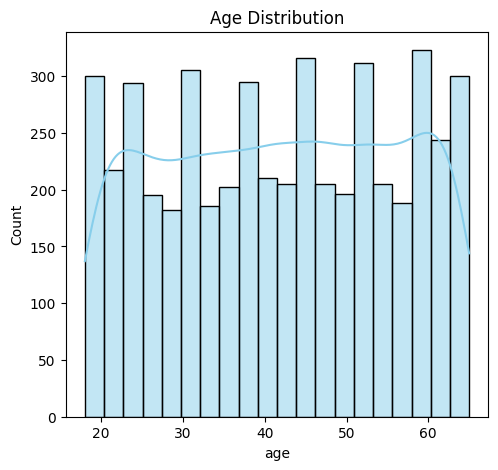

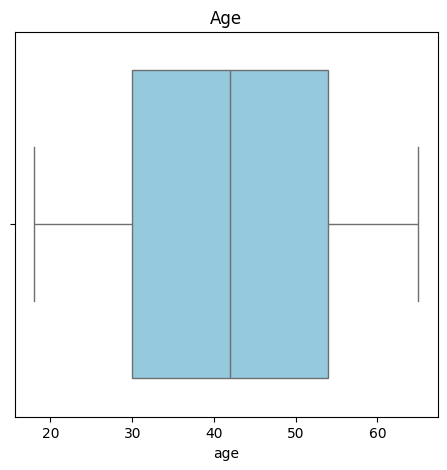

In [35]:
# Histograms to view distribution
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_normal_users['age'], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution")

plt.show()

# Box plots to detect outliers
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df_normal_users['age'], color="skyblue")
plt.title("Age")

plt.show()

##### total_time_watch_hours column

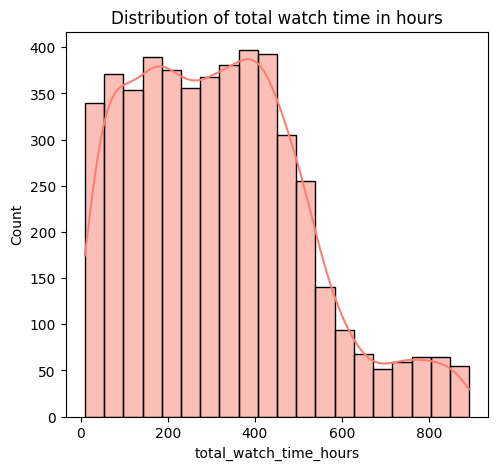

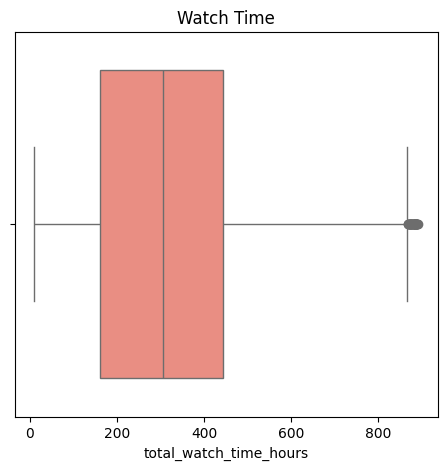

In [36]:
# Histograms to view distribution
plt.figure(figsize=(12,5))

plt.subplot(1,2,2)
sns.histplot(df_normal_users['total_watch_time_hours'], bins=20, kde=True, color="salmon")
plt.title("Distribution of total watch time in hours")

plt.show()

# Box plots to detect outliers
plt.figure(figsize=(12,5))

plt.subplot(1,2,2)
sns.boxplot(x=df_normal_users['total_watch_time_hours'], color="salmon")
plt.title("Watch Time")

plt.show()

In [37]:
# Check if any values remain outside the limits
col = "total_watch_time_hours"

aun_outliers = df_normal_users[(df_normal_users[col] < lower_bound) | (df_normal_users[col] > upper_bound)]
if aun_outliers.empty:
    print("\nNo outliers according to the IQR method.")
else:
    print("\nStill outliers detected:", aun_outliers.shape[0])


No outliers according to the IQR method.


Now, the **`df_normal_users`** dataframe is free of outliers, and this data can be used for analysis. Furthermore, the **`df_users_outlier`** dataframe was saved, which contains only the rows that were considered outliers. These were not removed because they may provide valuable insights into how that specific sample behaves.